# 9 Webマーケティング・SNSマーケティング
## 9.1 ネットワーク分析による消費者間の関係分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [80]:
df_nw = pd.read_excel('978-4-274-22101-9.xlsx', 'ネットワークデータ')
df_nw = df_nw.iloc[0:626, 0:2]
df_nw.head()

,from,to
0,1,5
1,1,16
2,1,19
3,1,22
4,1,23


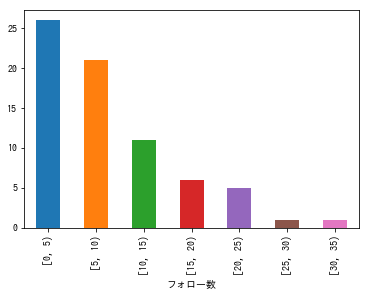

In [39]:
# フォロー数ヒストグラム
df_follow_rank = df_nw.groupby(['from']).size().sort_values()
df_follow_rank = pd.cut(df_follow_rank, [0, 5, 10, 15, 20, 25, 30, 35], right=False)
df_follow_rank = pd.DataFrame(df_follow_rank)
df_follow_rank.columns = ['フォロー数']
df_follow_rank.groupby(['フォロー数']).size().plot.bar()

In [36]:
# 密度
vertex_from = set(df_nw['from'])
vertex_to = set(df_nw['to'])
vertexs = len(vertex_from | vertex_to)
edges = len(df_nw)
edges / (vertexs * (vertexs - 1))

0.09409816320385427

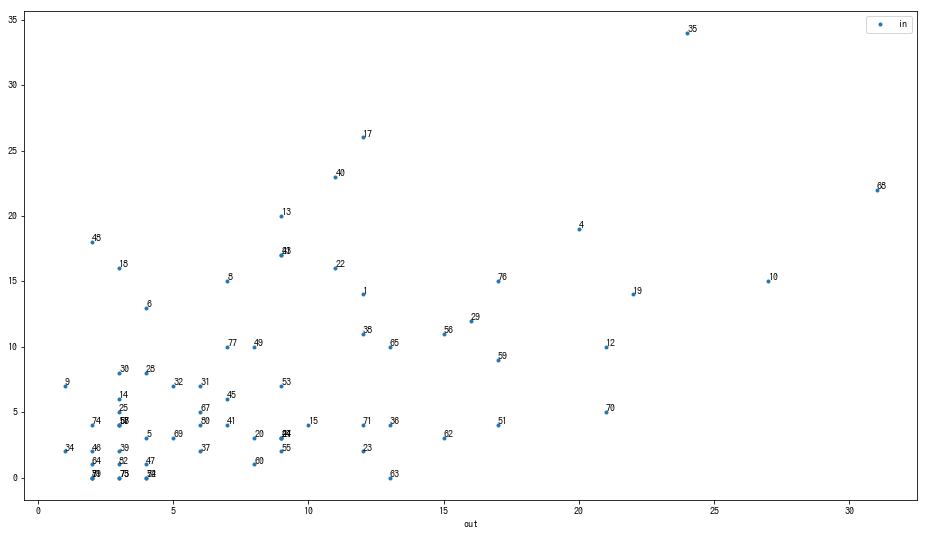

In [93]:
# 次数中心性
df_degree_centrality = pd.DataFrame()
df_degree_centrality['out'] = df_nw.groupby(['from']).size()
df_degree_centrality['in'] = df_nw.groupby(['to']).size()
df_degree_centrality = df_degree_centrality.fillna(0)
df_degree_centrality.plot(x='out', y='in', style='.', figsize=(16, 9))
for uid in df_degree_centrality.index:
    plt.annotate(str(uid), (df_degree_centrality.loc[uid, 'out'], df_degree_centrality.loc[uid, 'in']))

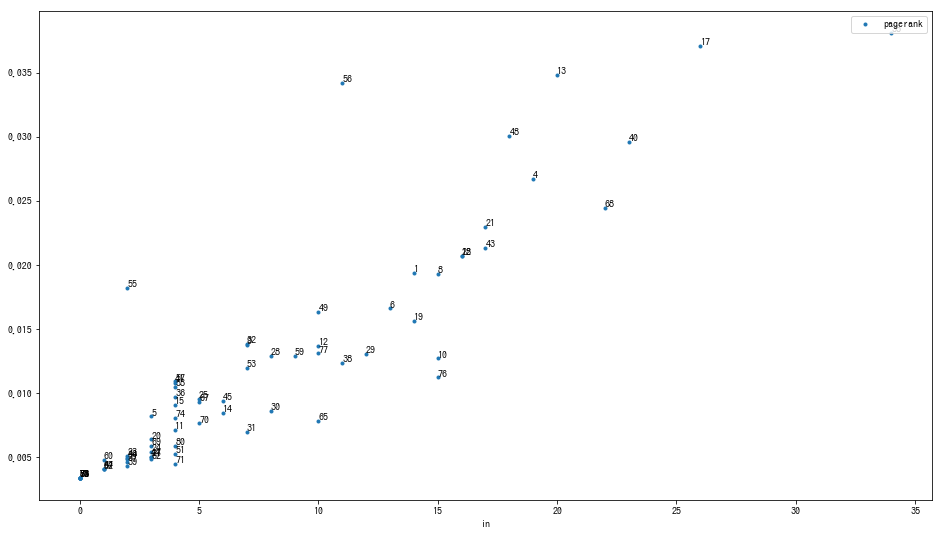

In [92]:
# PageRank
import networkx

vertex_from = set(df_nw['from'])
vertex_to = set(df_nw['to'])
vertexs = vertex_from | vertex_to
g = networkx.DiGraph()
for v in vertexs:
    g.add_node(v)
for idx in df_nw.index:
    f, t = df_nw.loc[idx]
    g.add_edge(f, t)
pagerank = networkx.pagerank_numpy(g, alpha=0.85)

df_in_pr = pd.DataFrame()
df_in_pr['in'] = df_degree_centrality['in']
df_in_pr['pagerank'] = pd.Series(pagerank)
df_in_pr.plot(x='in', y='pagerank', style='.', figsize=(16, 9))
for uid in df_in_pr.index:
    plt.annotate(uid, (df_in_pr.loc[uid, 'in'], df_in_pr.loc[uid, 'pagerank']))

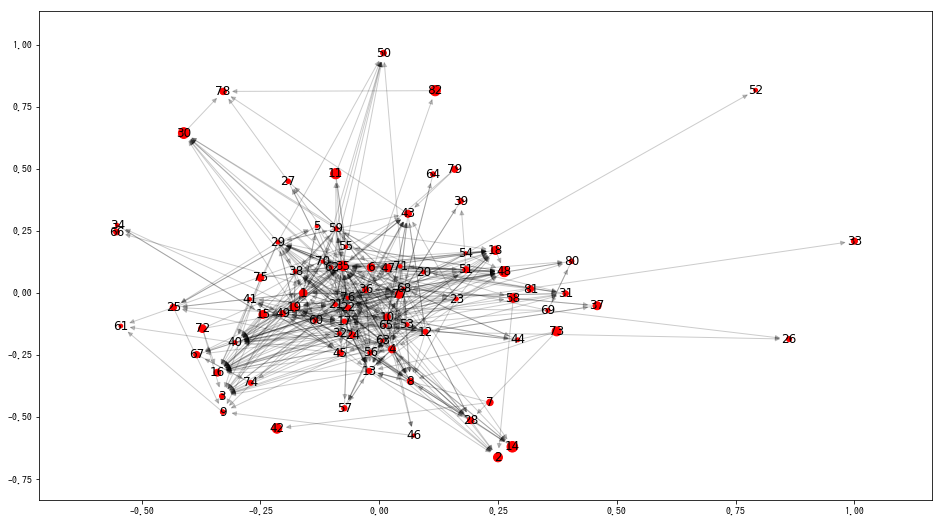

In [95]:
# ネットワーク図
import math

plt.figure(figsize=(16, 9))

layout = networkx.spring_layout(g, k=4/math.sqrt(len(g.nodes)))
node_size = [pr * 3000 for pr in df_in_pr['pagerank']]
networkx.draw_networkx_nodes(g, layout, node_size=node_size, node_color='r')
networkx.draw_networkx_edges(g, layout, alpha=0.2)
networkx.draw_networkx_labels(g, layout)
plt.show()

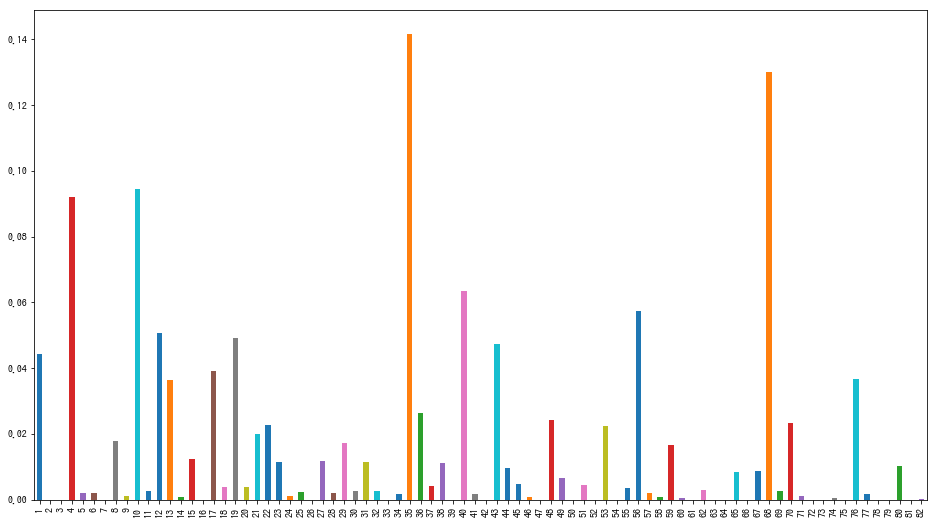

In [100]:
# 媒介中心性
betweenness_centrality = networkx.betweenness_centrality(g)
s_betweenness_centrality = pd.Series(betweenness_centrality)
s_betweenness_centrality.plot.bar(figsize=(16, 9))

# 9.2 テキストマイングによる口コミの解析

In [2]:
df_kuchikomi = pd.read_excel('978-4-274-22101-9.xlsx', '商品クチコミ・データ')
df_kuchikomi = df_kuchikomi.iloc[0:124, 1:2]
df_kuchikomi.head()

,クチコミ文章
0,「商品説明文」にも記載のあるように、ほかの調味料を併用しなくても煮物が美味しくできあがります...
1,この商品を使用してから他の商品は使用できません。上品な味になって美味しいので最高です。
2,以前お試しサイズをお買って、大変気に入りました。洋風料理にも隠し味で加えると甘味と風味がよく...
3,値段はちょっと高いけど、適当に味付けしてもちゃんと味が決まるので好きです。
4,この商品とお醤油で照り焼きを作ると、見た目もよくとても美味しいです。


In [3]:
# 頻度の高い単語
import MeCab
import re
import math

mecab = MeCab.Tagger()
split_field = re.compile('[\t,]').split
split_line = re.compile('\n').split
counter = {}
for kuchikomi in df_kuchikomi['クチコミ文章']:
    if type(kuchikomi) == float:
        continue
    parsed = mecab.parse(kuchikomi)
    lines = split_line(parsed)
    for line in lines:
        fields = split_field(line)
        if len(fields) <= 1:
            continue
        if fields[1] == '名詞' or fields[1] == '形容詞' or fields[1] == '動詞':
            if fields[0] in counter:
                counter[fields[0]] += 1
            else:
                counter[fields[0]] = 1
print(counter)

{'商品': 90, '説明': 1, '文': 1, '記載': 1, 'ある': 13, 'よう': 11, 'ほか': 1, '調味': 26, '料': 29, '併用': 3, 'し': 89, '煮物': 24, '美味しく': 15, 'できあがり': 1, 'シンプル': 5, '料理': 40, '味': 36, '引き立つ': 1, '使用': 10, '他': 31, 'でき': 15, '上品': 3, 'なっ': 7, '美味しい': 15, '最高': 2, '以前': 4, '試し': 7, 'サイズ': 6, '買っ': 5, '大変': 5, '気に入り': 1, '洋風': 1, '隠し': 1, '加える': 1, '甘味': 1, '風味': 14, 'なり': 22, '良けれ': 1, 'おかず': 1, '何': 15, '倍': 2, '値段': 7, '高い': 5, '適当': 1, '味付け': 7, '決まる': 1, '好き': 3, '醤油': 10, '照り': 5, '焼き': 4, '作る': 5, '見た目': 1, '買い方': 1, 'まちまち': 1, '出汁': 1, '以外': 2, 'の': 24, '多い': 1, '使え': 7, 'おいしい': 7, '使っ': 31, 'み': 12, 'これ': 29, '一番': 2, 'よい': 6, '感じ': 4, '落ち着き': 1, 'くせ': 1, 'なく': 6, '余分': 1, 'もの': 8, '入っ': 3, 'て': 4, '香り': 2, '甘み': 7, '使い': 9, 'やすい': 3, '我が家': 10, '和食': 5, '欠か': 2, 'せ': 5, '使う': 15, '砂糖': 14, '減り': 1, '見': 2, '通り': 1, 'スーパー': 8, '購入': 27, 'する': 18, '以上': 2, '割高': 1, 'クセ': 1, '(': 1, '慣れる': 1, '平気': 1, ')、': 1, '最初': 1, '難しい': 1, 'しれ': 1, '友達': 1, 'いる': 16, '聞い': 1, '買い': 4, 'コク': 5, '出': 3, 'おいしく':

/home/opt/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

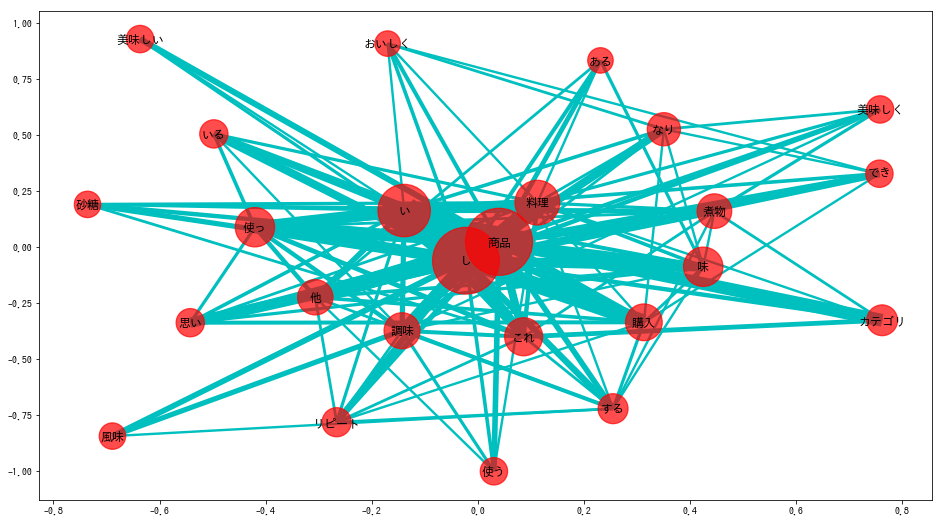

In [14]:
# 構文解析・共起ネットワーク
import collections
import itertools
import networkx

tags_list = []
for kuchikomi in df_kuchikomi['クチコミ文章']:
    if type(kuchikomi) == float:
        continue
    parsed = mecab.parse(kuchikomi)
    lines = split_line(parsed)
    tags = []
    for line in lines:
        fields = split_field(line)
        if len(fields) <= 1:
            continue
        if (fields[1] == '名詞' and not fields[2] in {'数', '接尾', '非自立'}) or fields[1] == '形容詞' or fields[1] == '動詞':
            tags.append(fields[0])
    if tags:
        tags_list.append(tags)

tags = sum(tags_list, [])  # flatten
tag_count = collections.Counter(tags).most_common(25)
graph = networkx.Graph()
graph.add_nodes_from([(tag, {'count': count}) for tag, count in tag_count])
for tags in tags_list:
    for n0, n1 in itertools.combinations(tags, 2):
        if not graph.has_node(n0) or not graph.has_node(n1):
            continue
        if graph.has_edge(n0, n1):
            graph[n0][n1]['weight'] += 1
        else:
            graph.add_edge(n0, n1, weight=1)

# Ensure visibility
# e = (n0, n1, d)
trim_edges = list(filter(lambda e: e[2]['weight'] <= 5, graph.edges(data=True)))
for u, v, d in trim_edges:
    graph.remove_edge(u, v)

    plt.figure(figsize=(16, 9))

node_size = [d['count'] * 50 for _, d in graph.nodes(data=True)]
edge_width = [d["weight"] * 0.4 for _, _, d in graph.edges(data=True)]
node_length = len(graph.nodes)
layout = networkx.spring_layout(graph, k=4/math.sqrt(node_length))
networkx.draw_networkx_nodes(graph, layout, node_color='r', alpha=0.7, node_size=node_size, linewidths=1.25)
networkx.draw_networkx_labels(graph, layout, font_family='IPAGothic')
networkx.draw_networkx_edges(graph, layout, edge_color='C', width=edge_width)
plt.show()

In [22]:
# クチコミ単位でネガポジ
mecab = MeCab.Tagger()
split_field = re.compile('[\t,]').split
split_line = re.compile('\n').split

pndic = {}
# http://www.lr.pi.titech.ac.jp/~takamura/pubs/pn_ja.dic
with open('pn_ja.dic.utf8') as f:
    while True:
        line = f.readline()
        if len(line) == 0:
            break
        a = line.split(':')
        pndic[a[0]] = float(a[3])
        pndic[a[1]] = float(a[3])

most_positive = -1
most_positive_score = 0
most_negative = math.inf
most_negative_score = 0
for kuchikomi in df_kuchikomi['クチコミ文章']:
    if type(kuchikomi) == float:
        continue
    parsed = mecab.parse(kuchikomi)
    lines = split_line(parsed)
    score = 0
    for line in lines:
        fields = split_field(line)
        if len(fields) <= 1:
            continue
        if (fields[1] == '名詞' and not fields[2] in {'数', '接尾', '非自立'}) or fields[1] == '形容詞' or fields[1] == '動詞':
            if fields[0] in pndic:
                score += pndic[fields[0]]
    if score > most_positive_score:
        most_positive = kuchikomi
        most_positive_score = score
    elif score < most_negative_score:
        most_negative = kuchikomi
        most_negative_score = score

print('most positive: ', most_positive_score)
print(most_positive)
print('most negative: ', most_negative_score)
print(most_negative)

most positive:  0.806762
味が良いし何より安全なのがうれしいです。
most negative:  -27.101845999999995
瓶入りの商品です。醸造で生成されたアルコール分、糖類、アミノ酸類、有機酸類、ビタミン類と少量の塩分を含んでおり、素材への味付けが良く、風味を引き立てます。着色料、防腐剤、香料などは使用していません。という項目に着目して期待して購入しました。こちらの一升瓶タイプもありますが冷蔵庫に入る大きさにしました。我が家の食事は塩分制限が基本なので、味付けは基本的に薄いので素材のうまさが大変重要になります。こうしていつもと違った調味料を使用してもっと美味しくできたらたらいいなと思います。


## 9.3 アクセスログデータを元にした顧客のサイト内行動分析

In [40]:
# アクセスログデータを用いたリピート購買分析
df_repeat = pd.read_excel('978-4-274-22101-9.xlsx', 'リピート購買データ')
df_repeat = df_repeat.iloc[0:1501, 1:6]
df_repeat.head()

,2回目購買 （1=リピートあり，0＝リピートなし）,平均PV（ページ）,平均滞在時間（秒）,セッション数（回）,購買金額（初回購買金額）
0,1,127,490,1,8000
1,0,14,660,6,46000
2,0,31,260,1,41000
3,0,22,440,1,1000
4,0,53,450,2,38000


In [42]:
import statsmodels.api as sm
X = df_repeat.drop(['2回目購買\n（1=リピートあり，0＝リピートなし）'], axis=1)
Y = df_repeat['2回目購買\n（1=リピートあり，0＝リピートなし）']
X = sm.add_constant(X)

logit = sm.Logit(Y, X)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.679823
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     2回目購買
（1=リピートあり，0＝リピートなし）   No. Observations:                 1500
Model:                                 Logit   Df Residuals:                     1495
Method:                                  MLE   Df Model:                            4
Date:                       Sun, 17 Feb 2019   Pseudo R-squ.:                 0.01922
Time:                               17:34:20   Log-Likelihood:                -1019.7
converged:                              True   LL-Null:                       -1039.7
                                               LLR p-value:                 4.383e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6537      0.129     -5.050      0.000      -0.907      -0.400
平均PV（ページ）        0.0010      0.002      0.523      0.601      -0.003       0.005
平均滞在時間（秒）     7.753e-05      0.000      0.613      0.540      -0.000       0.000
セッション数（回）        0.1355      0.032      4.191      0.000       0.072       0.199
購買金額（初回購買金額）  1.344e-05   3.55e-06      3.791      0.000    6.49e-06    2.04e-05
================================================================================
"""

In [50]:
# 混同行列
# |実際\予測|離反0|リピート1|
# |離反0    |-|-|
# |リピート1|-|-|
pred_table = result.pred_table()
pred_table

array([[495., 255.],
       [403., 347.]])

In [52]:
# accuracy
(pred_table[0][0] + pred_table[1][1]) / pred_table.sum()

0.5613333333333334

In [57]:
# マルコフモデルによるコンバージョン分析
df_web_transit = pd.read_excel('978-4-274-22101-9.xlsx', 'ウェブ・ページ遷移データ')
df_web_transit = df_web_transit.iloc[1:12, 0:12]
df_web_transit.index = df_web_transit.columns
df_web_transit

,トップ,概要,機能,詳細,料金表,オプション,FAQ,その他,申込,離脱
トップ,0.077,0.148,0.318,0.026,0.15,0.02,0.022,0.062,0.046,0.131
概要,0.032,0.284,0.213,0.026,0.099,0.023,0.018,0.03,0.018,0.257
機能,0.014,0.055,0.507,0.103,0.113,0.029,0.011,0.014,0.01,0.144
詳細,0.027,0.068,0.173,0.298,0.118,0.031,0.036,0.033,0.018,0.198
料金表,0.031,0.069,0.127,0.045,0.183,0.075,0.038,0.031,0.054,0.347
オプション,0.037,0.077,0.185,0.052,0.145,0.168,0.073,0.027,0.009,0.227
FAQ,0.029,0.039,0.044,0.437,0.066,0.035,0.17,0.041,0.029,0.11
その他,0.089,0.088,0.098,0.115,0.091,0.023,0.031,0.091,0.007,0.367
申込,0,0,0,0,0,0,0,0,1,0
離脱,0,0,0,0,0,0,0,0,0,1


In [77]:
# 各ページのコンバージョンへの寄与度
I = np.eye(8, 8, dtype=np.float64)
Q = df_web_transit.iloc[0:8, 0:8].values.astype(np.float64)
R = df_web_transit.iloc[0:8, 8:10].values.astype(np.float64)
conv_rate = np.linalg.inv(I - Q) @ R
df_conv_rate = pd.DataFrame(index=df_web_transit.index[0:8])
df_conv_rate['コンバージョン(G)'] = conv_rate[:, 0]
df_conv_rate['離脱（H)'] = conv_rate[:, 1]
df_conv_rate

,コンバージョン(G),離脱（H)
トップ,0.122380,0.877620
概要,0.083123,0.916877
機能,0.086520,0.913480
詳細,0.090717,0.909283
料金表,0.111202,0.888798
オプション,0.080098,0.919902
FAQ,0.110926,0.889074
その他,0.065477,0.934523
